In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier





In [2]:
CARPETA_DATOS_LIMPIOS = 'Datos/Limpios/'
df= pd.read_csv(os.path.join(CARPETA_DATOS_LIMPIOS, 'df_adquisicion.csv'))
lista_variables= ['growth_stage', 'startup', 'b2b_b2c', 'Nombre_sabi']
df = df.drop(lista_variables, axis=1)

df_missings= pd.read_csv(os.path.join(CARPETA_DATOS_LIMPIOS, 'df_adquisicion_missings.csv'))

# Se entrenan los modelos con el df completo

In [3]:
df.head()

,Anos en Mercado,Cash flow mil EUR_2021,EBITDA mil EUR_2021,Inmovilizado mil EUR_2021,Fondos propios mil EUR_2021,Valor agregado mil EUR_2021,Total pasivo_ratio,Inmovilizado mil EUR_ratio,Capital suscrito mil EUR_2021,Capital social mil EUR,Gastos financieros mil EUR_ratio,Gastos de personal mil EUR_2021,Resultado financiero mil EUR_ratio,Total pasivo y capital propio mil EUR_2021,Total activo mil EUR_2021,Gastos financieros mil EUR_2021,Pasivo fijo mil EUR_2021,total_funding,Porcentaje_adquisicion_cat
0,32,3296.408000,3600.559000,8604.70000,12382.28400,6893.59300,1.439262,0.980366,745.330,745.330,1.526306,3302.98000,0.696217,1.950122e+04,1.950122e+04,100.03600,4198.31500,0.03,1
1,31,-35.104810,54.851080,137.24646,1242.34124,423.95067,0.600331,0.762976,291.485,291.485,43.385462,459.05548,-282.969141,1.793114e+03,1.793114e+03,90.16063,47.65796,0.07,1
2,38,3589.000000,6182.000000,150758.00000,146672.00000,105344.00000,1.163202,1.431985,2000.000,2000.000,0.634522,98266.00000,-0.045835,1.183593e+06,1.183593e+06,3540.00000,216871.00000,0.00,2
3,20,-72.670569,-20.896349,2983.85415,1048.72675,1585.07324,1.635357,1.048763,158.970,158.970,1.723532,1584.17903,-0.993082,6.646021e+03,6.646021e+03,73.56478,1477.75274,0.56,1
4,18,3670.000000,9977.000000,143704.00000,167478.00000,12660.00000,0.947751,1.106232,13301.000,13301.000,1.488876,7230.00000,1.617527,2.374040e+05,2.374040e+05,9971.00000,37827.00000,100.00,2


In [4]:
# se dividen los datos en train y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Porcentaje_adquisicion_cat']), df['Porcentaje_adquisicion_cat'], test_size=0.1, random_state=42)


In [5]:
# el primer modelo que se prueba es el automl de tpot

from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42, n_jobs=-1)
tpot.fit(X_train, y_train)



                                                                             
Generation 1 - Current best internal CV score: 0.6081081081081081
                                                                              
Generation 2 - Current best internal CV score: 0.6081081081081081
                                                                              
Generation 3 - Current best internal CV score: 0.6108108108108109
                                                                              
Generation 4 - Current best internal CV score: 0.6162162162162161
                                                                              
Generation 5 - Current best internal CV score: 0.6162162162162161
                                                                              
Best pipeline: ExtraTreesClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=True, criterion=gini, max_features=0.8500000000000001, min_samples_leaf=11, min_samples_split=20, n_estimators=

TPOTClassifier(generations=5, n_jobs=-1, population_size=50, random_state=42,
               verbosity=2)

Accuracy:  0.6432432432432432


Text(0.5, 25.722222222222214, 'Predicted')

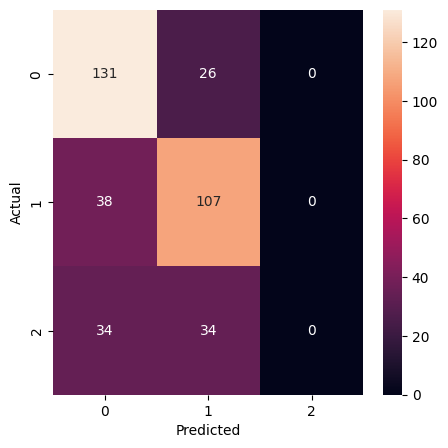

In [6]:
# se prueba el modelo con los datos de test
prediccion = tpot.predict(X_train)
print('Accuracy: ', accuracy_score(y_train, prediccion))
# plot confusion matrix
cm = confusion_matrix(y_train, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [7]:
# se prueban modelos simples de sklearn

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# se entrenan los modelos
modelos = [
    ('Regresion logistica', LogisticRegression()),
    ('Random forest', RandomForestClassifier()),
    ('SVC', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Decision tree', DecisionTreeClassifier()),
    ('GaussianNB', GaussianNB())
]

# se entrenan y evaluan los modelos
for name, model in modelos:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name}: {scores.mean()}')


Regresion logistica: 0.44594594594594594
Random forest: 0.5864864864864865
SVC: 0.43243243243243246
KNN: 0.5216216216216216
Decision tree: 0.47027027027027024
GaussianNB: 0.5459459459459459


Los modelos que mejor funcionan son el random forest y el arbol de decision

## STACKING

Best parameters:  {'final_estimator__C': 10, 'final_estimator__kernel': 'rbf'}
Best estimator:  StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=0)),
                               ('log',
                                LogisticRegression(max_iter=10000,
                                                   random_state=0)),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier(random_state=0)),
                               ('gnb', GaussianNB())],
                   final_estimator=SVC(C=10, random_state=0))
Best score:  0.5675675675675677
Accuracy:  0.40476190476190477


Text(0.5, 25.722222222222214, 'Predicted')

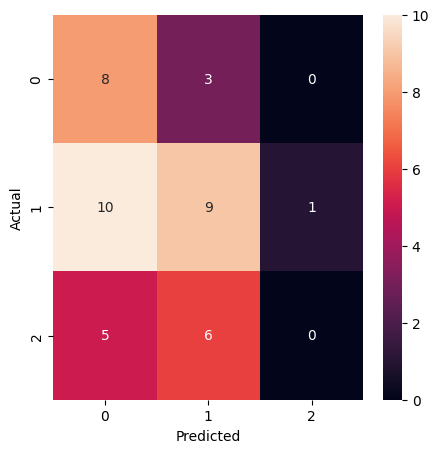

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

estimators = [    ('rf', RandomForestClassifier(random_state=0)),    ('log', LogisticRegression(max_iter=10000, random_state=0)),    ('knn', KNeighborsClassifier()),    ('dt', DecisionTreeClassifier(random_state=0)),    ('gnb', GaussianNB())]

param_grid = {
    'final_estimator__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'final_estimator__C': [0.1, 1, 10]
}

clf = StackingClassifier(
    estimators=estimators, final_estimator=SVC(random_state=0)
)

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameters: ', grid_search.best_params_)
print('Best estimator: ', grid_search.best_estimator_)
print('Best score: ', grid_search.best_score_)

# evaluate best estimator on test set
best_estimator = grid_search.best_estimator_
prediccion = best_estimator.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, prediccion))

# plot confusion matrix
cm = confusion_matrix(y_test, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [9]:
# bagging
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=0)

scores = cross_val_score(clf, X_train, y_train, cv=5)

print('Accuracy scores:', scores)
print('Mean accuracy:', scores.mean())

Accuracy scores: [0.58108108 0.62162162 0.54054054 0.59459459 0.64864865]
Mean accuracy: 0.5972972972972973


In [10]:
# se hace un grid search para encontrar los mejores parametros para el modelo

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 10}
0.6135135135135135


Cross Validation Scores:  [0.63513514 0.62162162 0.56756757 0.55405405 0.68918919]
Mean CV Score:  0.6135135135135135
Accuracy:  0.8405405405405405


Text(0.5, 25.722222222222214, 'Predicted')

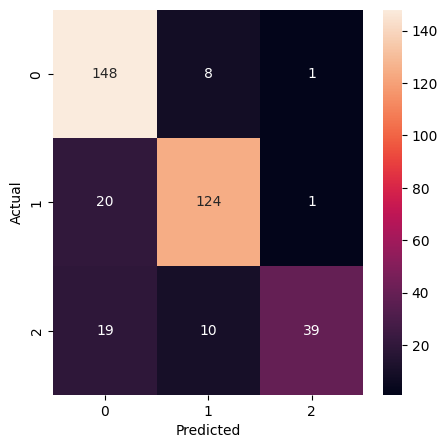

In [26]:
# se prueba el modelo con los hiperparametros encontrados

rf_mejorado = RandomForestClassifier(n_estimators=10, max_features='auto', max_depth=6, criterion='gini', random_state=0)

scores = cross_val_score(rf_mejorado, X_train, y_train, cv=5)

print('Cross Validation Scores: ', scores)
print('Mean CV Score: ', scores.mean())

# Entrenar el modelo con todos los datos de entrenamiento
rf_mejorado.fit(X_train, y_train)

# Predecir en los datos de entrenamiento y obtener la exactitud
prediccion = rf_mejorado.predict(X_train)
print('Accuracy: ', accuracy_score(y_train, prediccion))

# Graficar la matriz de confusión
cm = confusion_matrix(y_train, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')


El resultado mejora sustancialmente al cambiar los hiperparametros del random forest, mejorando el accuracy en 4 puntos porcentuales

In [12]:
# bayesion optimization

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

opt = BayesSearchCV(
    RandomForestClassifier(random_state=0),
    {
        'n_estimators': Integer(10, 500),
        'max_features': Categorical(['auto', 'sqrt', 'log2']),
        'max_depth': Integer(4, 8),
        'criterion': Categorical(['gini', 'entropy'])
    },
    n_iter=32,
    cv=5,
    random_state=0,
    n_jobs=-1
)

opt.fit(X_train, y_train)

print(opt.best_params_)
print(opt.best_score_)
print(opt.best_estimator_)

OrderedDict([('criterion', 'gini'), ('max_depth', 7), ('max_features', 'log2'), ('n_estimators', 107)])
0.6027027027027028
RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=107,
                       random_state=0)


Cross Validation Scores:  [0.58108108 0.62162162 0.52702703 0.62162162 0.66216216]
Mean CV Score:  0.6027027027027028
Accuracy:  0.918918918918919


Text(0.5, 25.722222222222214, 'Predicted')

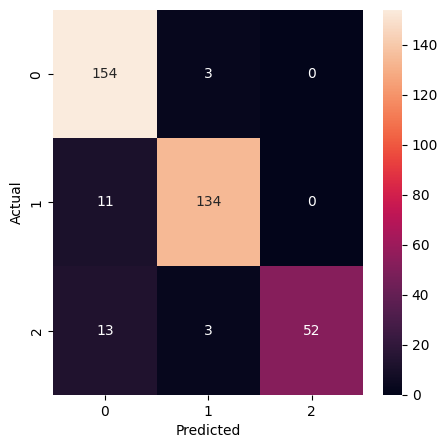

In [13]:
# se prueba este modelo con los hiperparametros encontrados

rf_mejorado = RandomForestClassifier(n_estimators=107, max_features='log2', max_depth=7, criterion='gini', random_state=0)

scores = cross_val_score(rf_mejorado, X_train, y_train, cv=5)

print('Cross Validation Scores: ', scores)
print('Mean CV Score: ', scores.mean())

# Entrenar el modelo con todos los datos de entrenamiento
rf_mejorado.fit(X_train, y_train)

# Predecir en los datos de entrenamiento y obtener la exactitud
prediccion = rf_mejorado.predict(X_train)
print('Accuracy: ', accuracy_score(y_train, prediccion))

# Graficar la matriz de confusión
cm = confusion_matrix(y_train, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# se ha probado sobre los datos de test y no ha dado tan mal


En este caso empeora el accuracy

Se ha conseguido mejorar ligéramente el score con el bagging

In [14]:
# se prueban modelos de boosting

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# se entrenan los modelos
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)

# se prueba el modelo con los datos de test
ada_scores = cross_val_score(ada, X_train, y_train, cv=5)

gbc_scores = cross_val_score(gbc, X_train, y_train, cv=5)

xgb_scores = cross_val_score(xgb, X_train, y_train, cv=5)

cbc_scores = cross_val_score(cbc, X_train, y_train, cv=5)

print('AdaBoost: ', ada_scores.mean())
print('GradientBoosting: ', gbc_scores.mean())
print('XGBoost: ', xgb_scores.mean())
print('CatBoost: ', cbc_scores.mean())

Learning rate set to 0.075214
0:	learn: 1.0765157	total: 150ms	remaining: 2m 30s
1:	learn: 1.0569717	total: 156ms	remaining: 1m 17s
2:	learn: 1.0386965	total: 160ms	remaining: 53.1s
3:	learn: 1.0205514	total: 163ms	remaining: 40.5s
4:	learn: 1.0033152	total: 167ms	remaining: 33.3s
5:	learn: 0.9892311	total: 173ms	remaining: 28.6s
6:	learn: 0.9723803	total: 176ms	remaining: 25s
7:	learn: 0.9600360	total: 179ms	remaining: 22.2s
8:	learn: 0.9493819	total: 183ms	remaining: 20.2s
9:	learn: 0.9391494	total: 189ms	remaining: 18.7s
10:	learn: 0.9284981	total: 192ms	remaining: 17.3s
11:	learn: 0.9188743	total: 195ms	remaining: 16.1s
12:	learn: 0.9098348	total: 200ms	remaining: 15.2s
13:	learn: 0.9014891	total: 206ms	remaining: 14.5s
14:	learn: 0.8915184	total: 210ms	remaining: 13.8s
15:	learn: 0.8829780	total: 215ms	remaining: 13.2s
16:	learn: 0.8746903	total: 220ms	remaining: 12.7s
17:	learn: 0.8640919	total: 225ms	remaining: 12.3s
18:	learn: 0.8552065	total: 228ms	remaining: 11.8s
19:	learn: 

En este caso el catboost da el mismo resultado que el random forest y el XGBoost también da muy buenos resultados, mejores que el arbol de decision

In [25]:

extra_tree= ExtraTreesClassifier(criterion='entropy',
                                      max_features=0.9500000000000001,
                                      min_samples_leaf=10, min_samples_split=9,
                                      random_state=0)

extra_tree.fit(X_train, y_train)

score= cross_val_score(extra_tree, X_train, y_train, cv=5)
score.mean()

0.6027027027027028

# Modelos con df con missings

In [15]:
# se divide en train y test

X_train_missings, X_test_missings, y_train_missings, y_test_missings = train_test_split(df_missings.drop(columns=['Porcentaje_adquisicion_cat', 'Codigo_NIF', 'b2b_b2c']), df_missings['Porcentaje_adquisicion_cat'], test_size=0.2, random_state=42)


In [16]:
# el primer modelo que se prueba es el automl de tpot

tpot = TPOTClassifier(generations=2, population_size=50, verbosity=2, random_state=42, n_jobs=-1, cv=5)
tpot.fit(X_train_missings, y_train_missings)

                                                                             
Generation 1 - Current best internal CV score: 0.6110955710955711
                                                                              
Generation 2 - Current best internal CV score: 0.6110955710955711
                                                                              
Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=10, min_samples_split=9, n_estimators=100)


TPOTClassifier(generations=2, n_jobs=-1, population_size=50, random_state=42,
               verbosity=2)

Accuracy:  0.6930091185410334
Pipeline(steps=[('extratreesclassifier',
                 ExtraTreesClassifier(criterion='entropy',
                                      max_features=0.9500000000000001,
                                      min_samples_leaf=10, min_samples_split=9,
                                      random_state=42))])


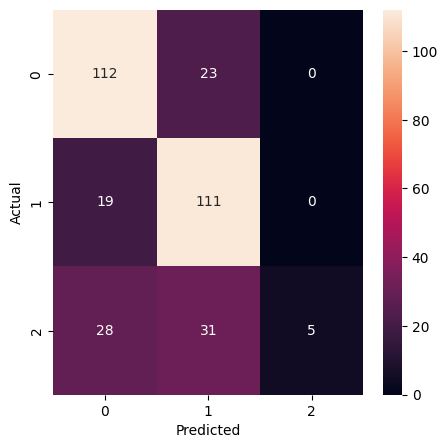

In [17]:
# se prueba el modelo con los datos de validacion
prediccion = tpot.predict(X_train_missings)
print('Accuracy: ', accuracy_score(y_train_missings, prediccion))
# plot confusion matrix
cm = confusion_matrix(y_train_missings, prediccion)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# se obtienen los hiperparametros del mejor modelo
print(tpot.fitted_pipeline_)

In [24]:

extra_tree= ExtraTreesClassifier(criterion='entropy',
                                      max_features=0.9500000000000001,
                                      min_samples_leaf=10, min_samples_split=9,
                                      random_state=0)

# se prueba el modelo con los datos de validacion
extra_tree.fit(X_train_missings, y_train_missings)

scores= cross_val_score(extra_tree, X_train_missings, y_train_missings, cv=5)
scores.mean()

0.598974358974359

In [18]:
# se prueban modelos de boosting

# se entrenan los modelos
ada_missing = AdaBoostClassifier()
ada_missing.fit(X_train_missings, y_train_missings)

gbc_missing = GradientBoostingClassifier(learning_rate=0.01,
                                            max_features=0.2,
                                            min_samples_leaf=11,
                                            min_samples_split=18,
                                            random_state=42,
                                            subsample=0.15000000000000002)
gbc_missing.fit(X_train_missings, y_train_missings)

xgb_missing = XGBClassifier()
xgb_missing.fit(X_train_missings, y_train_missings)

cbc_missing = CatBoostClassifier()
cbc_missing.fit(X_train_missings, y_train_missings)

# se prueba el modelo con los datos de test
ada_scores = cross_val_score(ada_missing, X_train_missings, y_train_missings, cv=5)

gbc_scores = cross_val_score(gbc_missing, X_train_missings, y_train_missings, cv=5)

xgb_scores = cross_val_score(xgb_missing, X_train_missings, y_train_missings, cv=5)

cbc_scores = cross_val_score(cbc_missing, X_train_missings, y_train_missings, cv=5)

print('AdaBoost: ', ada_scores.mean())
print('GradientBoosting: ', gbc_scores.mean())
print('XGBoost: ', xgb_scores.mean())
print('CatBoost: ', cbc_scores.mean())

Learning rate set to 0.074765
0:	learn: 1.0811559	total: 23.9ms	remaining: 23.9s
1:	learn: 1.0625269	total: 48.8ms	remaining: 24.3s
2:	learn: 1.0458872	total: 75.2ms	remaining: 25s
3:	learn: 1.0340288	total: 105ms	remaining: 26.2s
4:	learn: 1.0185272	total: 134ms	remaining: 26.6s
5:	learn: 1.0046047	total: 161ms	remaining: 26.7s
6:	learn: 0.9886300	total: 187ms	remaining: 26.6s
7:	learn: 0.9769594	total: 214ms	remaining: 26.5s
8:	learn: 0.9634742	total: 239ms	remaining: 26.4s
9:	learn: 0.9521695	total: 265ms	remaining: 26.3s
10:	learn: 0.9421491	total: 292ms	remaining: 26.2s
11:	learn: 0.9291917	total: 315ms	remaining: 26s
12:	learn: 0.9200599	total: 342ms	remaining: 26s
13:	learn: 0.9119939	total: 367ms	remaining: 25.9s
14:	learn: 0.9002752	total: 392ms	remaining: 25.7s
15:	learn: 0.8881590	total: 416ms	remaining: 25.6s
16:	learn: 0.8774236	total: 441ms	remaining: 25.5s
17:	learn: 0.8663354	total: 481ms	remaining: 26.3s
18:	learn: 0.8580175	total: 506ms	remaining: 26.1s
19:	learn: 0.8

Se obtienen los mismos resultados que con el df completo

In [3]:
# se crean modelos con todos los datos
x= df.drop(columns=['Porcentaje_adquisicion_cat'])
y= df['Porcentaje_adquisicion_cat']

# modelo simple de regresion logistica
lr = LogisticRegression()
lr.fit(x, y)

# modelo de Random Forest
rf= RandomForestClassifier(n_estimators=10, max_features='auto', max_depth=6, criterion='gini', random_state=0)
rf.fit(x, y)

# decision tree
dt= DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
dt.fit(x, y)

# extra tree
extra_tree= ExtraTreesClassifier(criterion='entropy',
                                        max_features=0.9500000000000001,                                                
                                        min_samples_leaf=10, min_samples_split=9,
                                        random_state=0)
extra_tree.fit(x, y)


ExtraTreesClassifier(criterion='entropy', max_features=0.9500000000000001,
                     min_samples_leaf=10, min_samples_split=9, random_state=0)

In [5]:
# se guardan los modelos que mejor resultado han dado
# se crea carpeta de modelos si no existe
if not os.path.exists('modelos'):
    os.makedirs('modelos')

# dentro de esa carpeta se crea otra carpeta para los modelos de clasificacion
if not os.path.exists('modelos/clasificacion'):
    os.makedirs('modelos/clasificacion')

# regresion logistica
pickle.dump(lr, open('modelos/clasificacion/lr_model.sav', 'wb'))

# se guarda el modelo de gradient boosting en la carpeta de modelos
pickle.dump(dt, open('modelos/clasificacion/dt_model.sav', 'wb'))

# se guarda el modelo de random forest
pickle.dump(rf, open('modelos/clasificacion/rf_model.sav', 'wb'))

# se guarda el modelo de catboost
pickle.dump(extra_tree, open('modelos/clasificacion/extra_tree.sav', 'wb'))
